# Census income classification with LightGBM

This notebook demonstrates how to use LightGBM to predict the probability of an individual making over $50K a year in annual income. It uses the standard UCI Adult income dataset. To download a copy of this notebook visit [github](https://github.com/slundberg/shap/tree/master/notebooks).

Gradient boosting machine methods such as LightGBM are state-of-the-art for these types of prediction problems with tabular style input data of many modalities. Tree SHAP ([arXiv paper](https://arxiv.org/abs/1802.03888)) allows for the exact computation of SHAP values for tree ensemble methods, and has been integrated directly into the C++ LightGBM code base. This allows fast exact computation of SHAP values without sampling and without providing a background dataset (since the background is inferred from the coverage of the trees).

Here we demonstrate how to use SHAP values to understand LightGBM model predictions. 

In [1]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import shap

# print the JS visualization code to the notebook
shap.initjs()

## Load dataset

In [2]:
X,y = shap.datasets.adult()
X_display,y_display = shap.datasets.adult(display=True)

# create a train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
d_train = lgb.Dataset(X_train, label=y_train)
d_test = lgb.Dataset(X_test, label=y_test)

## Train the model

In [3]:
params = {
    "max_bin": 512,
    "learning_rate": 0.05,
    "boosting_type": "gbdt",
    "objective": "binary",
    "metric": "binary_logloss",
    "num_leaves": 10,
    "verbose": -1,
    "min_data": 100,
    "boost_from_average": True
}

model = lgb.train(params, d_train, 10000, valid_sets=[d_test], early_stopping_rounds=50, verbose_eval=1000)

Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[573]	valid_0's binary_logloss: 0.278554


## Explain predictions

Here we use the Tree SHAP implementation integrated into Light GBM to explain the entire dataset (32561 samples).

In [4]:
shap_values = model.predict(X.as_matrix(), pred_contrib=True)

### Visualize a single prediction

Note that we use the "display values" data frame so we get nice strings instead of category codes. 

In [5]:
shap.force_plot(shap_values[0,:], X_display.iloc[0,:])

### Visualize many predictions

To keep the browser happy we only visualize 1,000 individuals.

In [6]:
shap.force_plot(shap_values[:1000,:], X_display.iloc[:1000,:])

[<iml.explanations.AdditiveExplanation at 0x1a14aa6828>,
 <iml.explanations.AdditiveExplanation at 0x1a14aa6908>,
 <iml.explanations.AdditiveExplanation at 0x1a14aa6668>,
 <iml.explanations.AdditiveExplanation at 0x1a127d95f8>,
 <iml.explanations.AdditiveExplanation at 0x1a127d9320>,
 <iml.explanations.AdditiveExplanation at 0x1a127d9208>,
 <iml.explanations.AdditiveExplanation at 0x1a127d9710>,
 <iml.explanations.AdditiveExplanation at 0x1a127d9898>,
 <iml.explanations.AdditiveExplanation at 0x1a127d9978>,
 <iml.explanations.AdditiveExplanation at 0x1a127d9a58>,
 <iml.explanations.AdditiveExplanation at 0x1a127d9b38>,
 <iml.explanations.AdditiveExplanation at 0x1a127d9c18>,
 <iml.explanations.AdditiveExplanation at 0x1a127d9cf8>,
 <iml.explanations.AdditiveExplanation at 0x1a127d9dd8>,
 <iml.explanations.AdditiveExplanation at 0x1a127d9eb8>,
 <iml.explanations.AdditiveExplanation at 0x1a127d9f98>,
 <iml.explanations.AdditiveExplanation at 0x1a14cd30b8>,
 <iml.explanations.AdditiveExplanation at 0x1a14cd3198>,
 <iml.explanations.AdditiveExplanation at 0x1a14cd3278>,
 <iml.explanations.AdditiveExplanation at 0x1a14cd3358>,
 <iml.explanations.AdditiveExplanation at 0x1a14cd3438>,
 <iml.explanations.AdditiveExplanation at 0x1a14cd3518>,
 <iml.explanations.AdditiveExplanation at 0x1a14cd35f8>,
 <iml.explanations.AdditiveExplanation at 0x1a14cd36d8>,
 <iml.explanations.AdditiveExplanation at 0x1a14cd37b8>,
 <iml.explanations.AdditiveExplanation at 0x1a14cd3898>,
 <iml.explanations.AdditiveExplanation at 0x1a14cd3978>,
 <iml.explanations.AdditiveExplanation at 0x1a14cd3a58>,
 <iml.explanations.AdditiveExplanation at 0x1a14cd3b38>,
 <iml.explanations.AdditiveExplanation at 0x1a14cd3c18>,
 <iml.explanations.AdditiveExplanation at 0x1a14cd3cf8>,
 <iml.explanations.AdditiveExplanation at 0x1a14cd3dd8>,
 <iml.explanations.AdditiveExplanation at 0x1a14cd3eb8>,
 <iml.explanations.AdditiveExplanation at 0x1a14cd3f98>,
 <iml.explanations.AdditiveExplanation at 0x1a14cdc0b8>,
 <iml.explanations.AdditiveExplanation at 0x1a14cdc198>,
 <iml.explanations.AdditiveExplanation at 0x1a14cdc278>,
 <iml.explanations.AdditiveExplanation at 0x1a14cdc358>,
 <iml.explanations.AdditiveExplanation at 0x1a14cdc438>,
 <iml.explanations.AdditiveExplanation at 0x1a14cdc518>,
 <iml.explanations.AdditiveExplanation at 0x1a14cdc5f8>,
 <iml.explanations.AdditiveExplanation at 0x1a14cdc6d8>,
 <iml.explanations.AdditiveExplanation at 0x1a14cdc7b8>,
 <iml.explanations.AdditiveExplanation at 0x1a14cdc898>,
 <iml.explanations.AdditiveExplanation at 0x1a14cdc978>,
 <iml.explanations.AdditiveExplanation at 0x1a14cdca58>,
 <iml.explanations.AdditiveExplanation at 0x1a14cdcb38>,
 <iml.explanations.AdditiveExplanation at 0x1a14cdcc18>,
 <iml.explanations.AdditiveExplanation at 0x1a14cdccf8>,
 <iml.explanations.AdditiveExplanation at 0x1a14cdcdd8>,
 <iml.explanations.AdditiveExplanation at 0x1a14cdceb8>,
 <iml.explanations.AdditiveExplanation at 0x1a14cdcf60>,
 <iml.explanations.AdditiveExplanation at 0x1a14ce6080>,
 <iml.explanations.AdditiveExplanation at 0x1a14ce6160>,
 <iml.explanations.AdditiveExplanation at 0x1a14ce6240>,
 <iml.explanations.AdditiveExplanation at 0x1a14ce6320>,
 <iml.explanations.AdditiveExplanation at 0x1a14ce6400>,
 <iml.explanations.AdditiveExplanation at 0x1a14ce64e0>,
 <iml.explanations.AdditiveExplanation at 0x1a14ce65c0>,
 <iml.explanations.AdditiveExplanation at 0x1a14ce66a0>,
 <iml.explanations.AdditiveExplanation at 0x1a14ce6780>,
 <iml.explanations.AdditiveExplanation at 0x1a14ce6860>,
 <iml.explanations.AdditiveExplanation at 0x1a14ce6940>,
 <iml.explanations.AdditiveExplanation at 0x1a14ce6a20>,
 <iml.explanations.AdditiveExplanation at 0x1a14ce6b00>,
 <iml.explanations.AdditiveExplanation at 0x1a14ce6be0>,
 <iml.explanations.AdditiveExplanation at 0x1a14ce6cc0>,
 <iml.explanations.AdditiveExplanation at 0x1a14ce6da0>,
 <iml.explanations.AdditiveExplanation at 0x1a14ce6e80>,
 <iml.explanations.AdditiveExplanation at 0x1a14ce6f60>,
 <iml.expl

## SHAP Summary Plot

Rather than use a typical feature importance bar chart, we use a density scatter plot of SHAP values for each feature to identify how much impact each feature has on the model output for individuals in the validation dataset. Features are sorted by the sum of the SHAP value magnitudes across all samples. It is interesting to note that the relationship feature has more total model impact than the captial gain feature, but for those samples where capital gain matters it has more impact than age. In other words, capital gain effects a few predictions by a large amount, while age effects all predictions by a smaller amount.

Note that when the scatter points don't fit on a line they pile up to show density, and the color of each point represents the feature value of that individual.

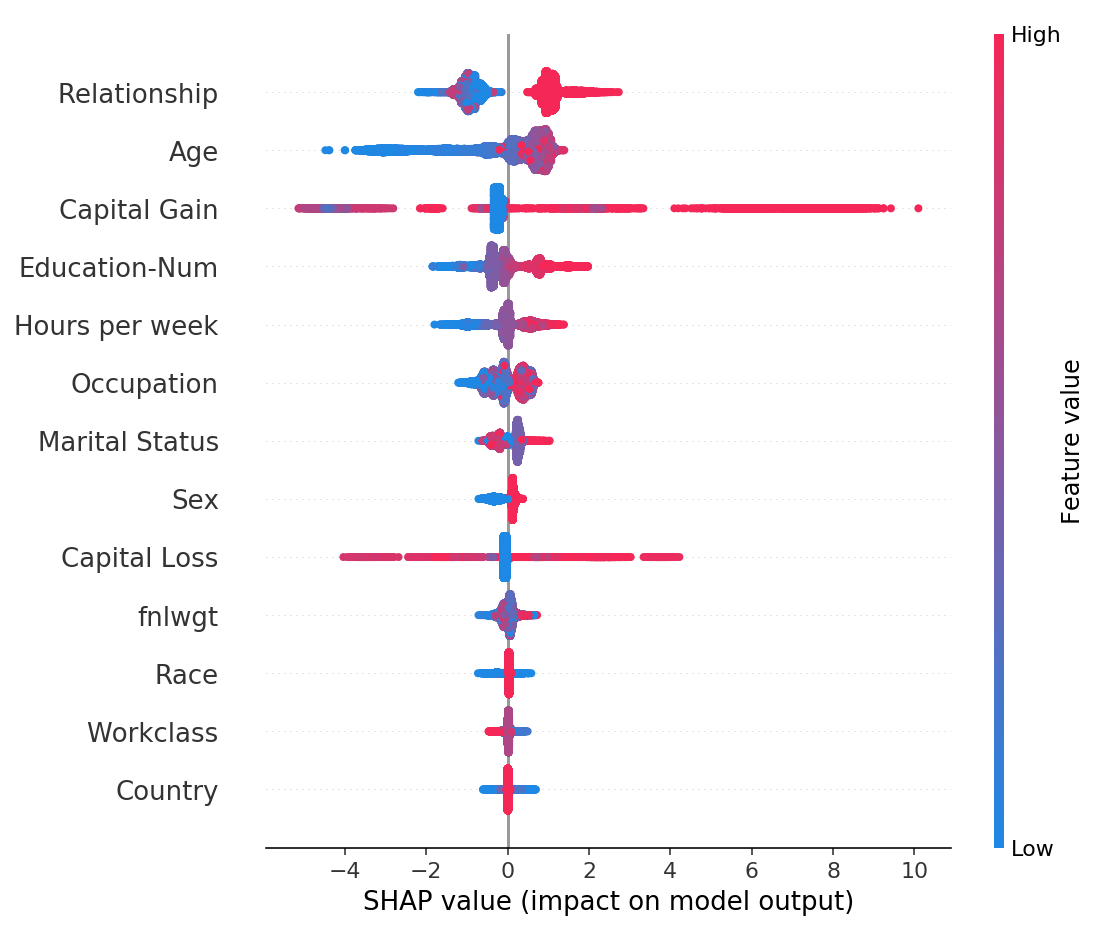

In [7]:
shap.summary_plot(shap_values, X)

## SHAP Dependence Plots

SHAP dependence plots show the effect of a single feature across the whole dataset. They plot a feature's value vs. the SHAP value of that feature across many samples. SHAP dependence plots are similar to partial dependence plots, but account for the interaction effects present in the features, and are only defined in regions of the input space supported by data. The vertical dispersion of SHAP values at a single feature value is driven by interaction effects, and another feature is chosen for coloring to highlight possible interactions.

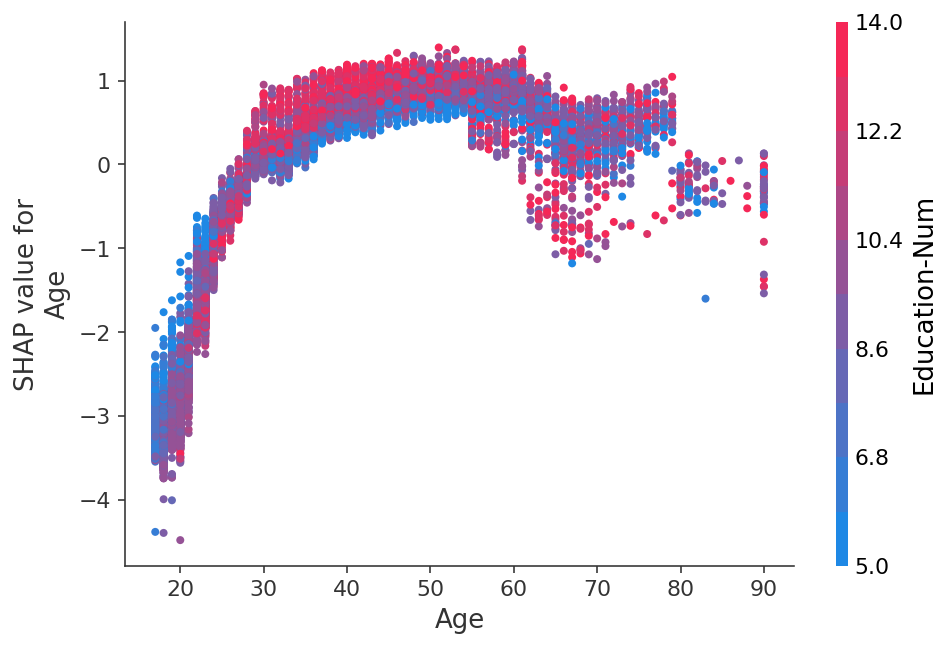

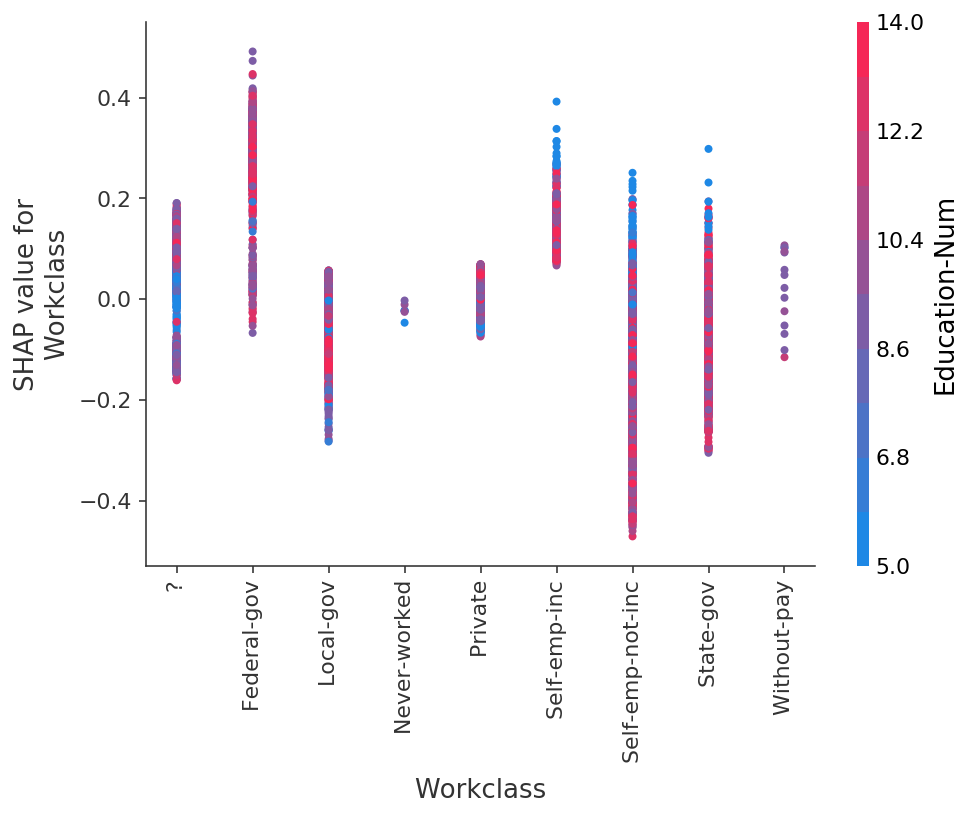

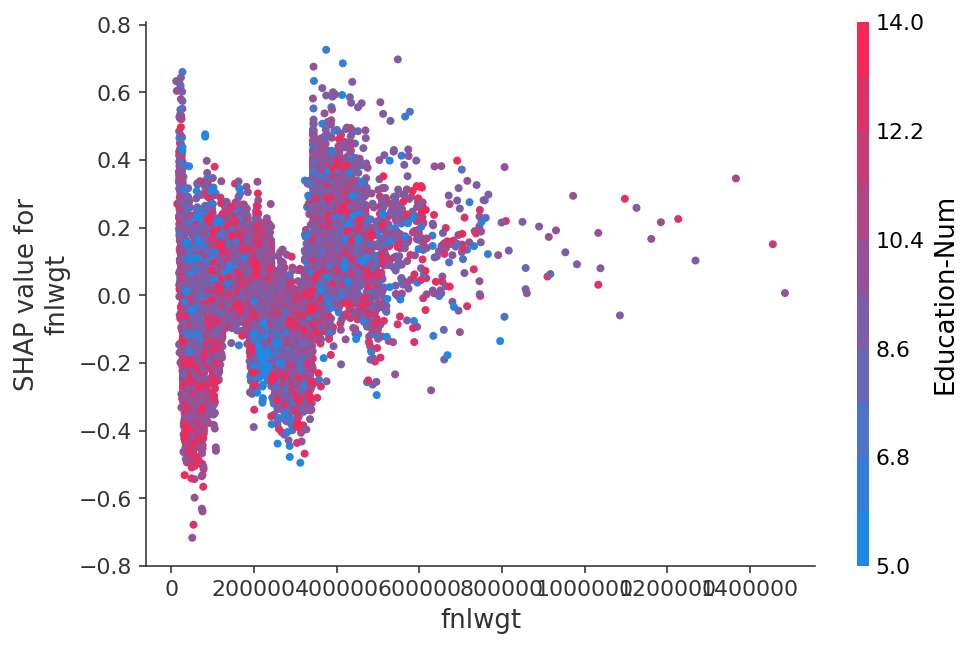

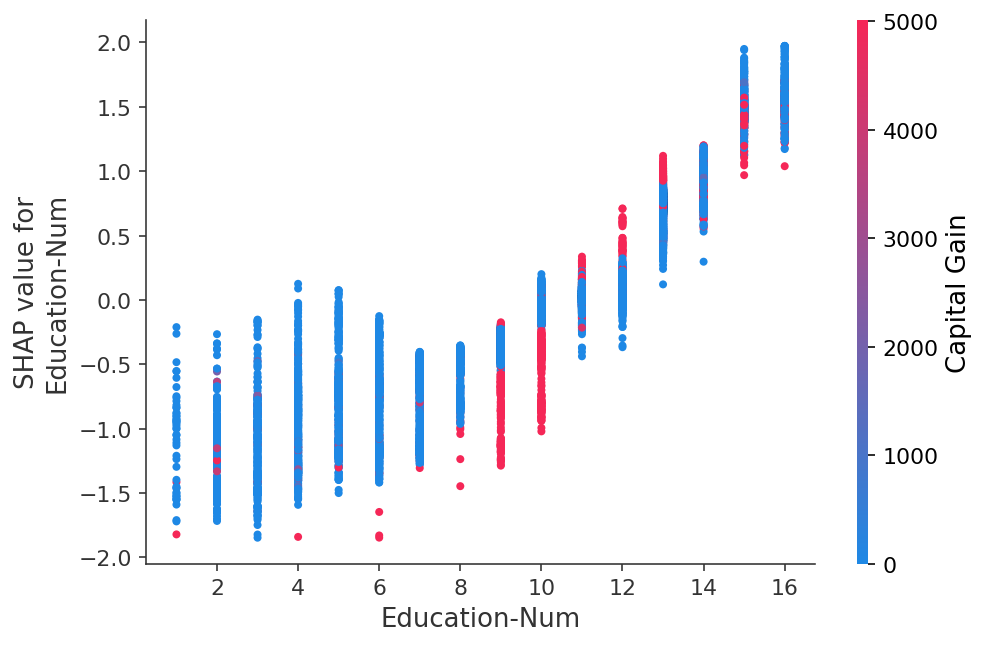

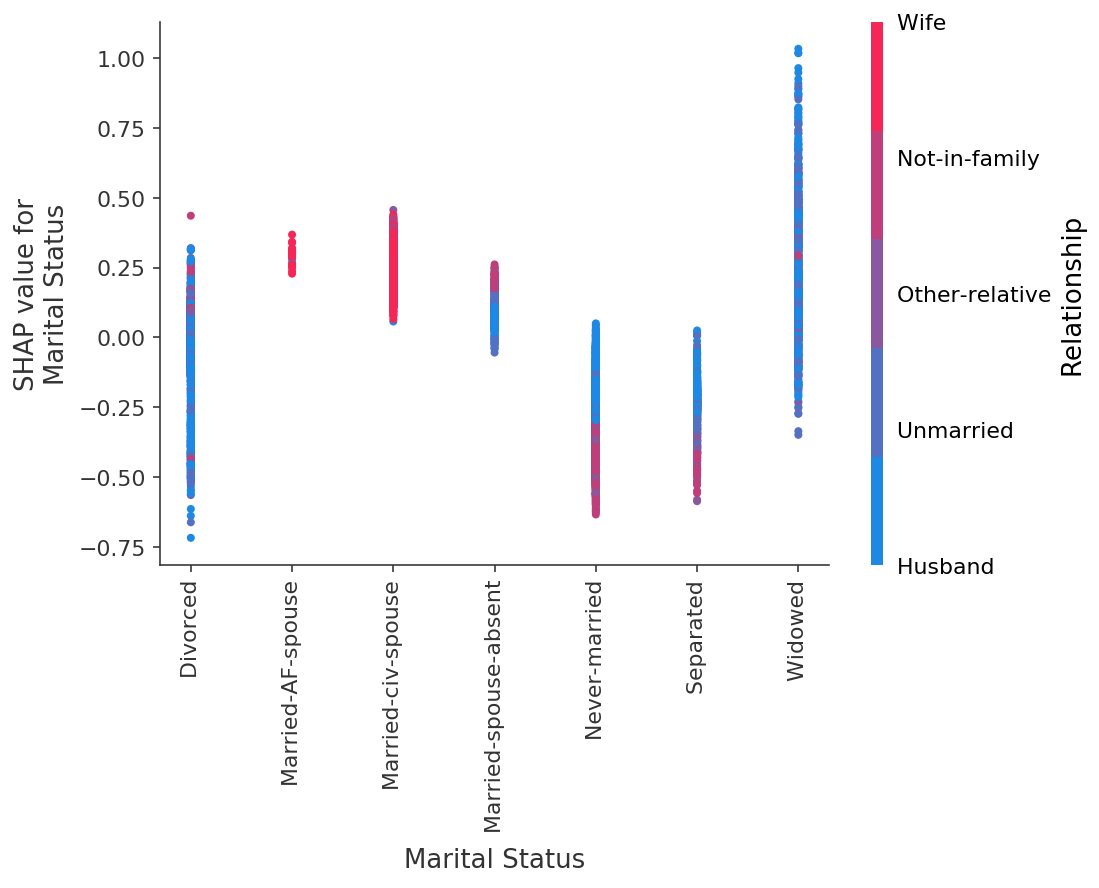

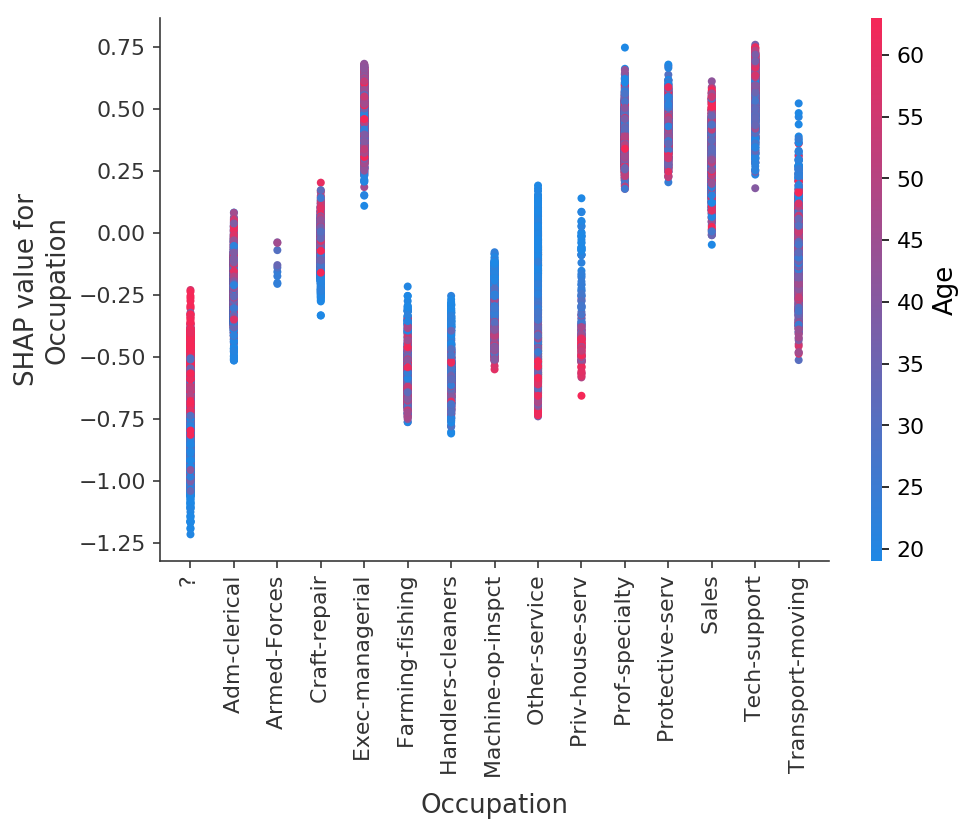

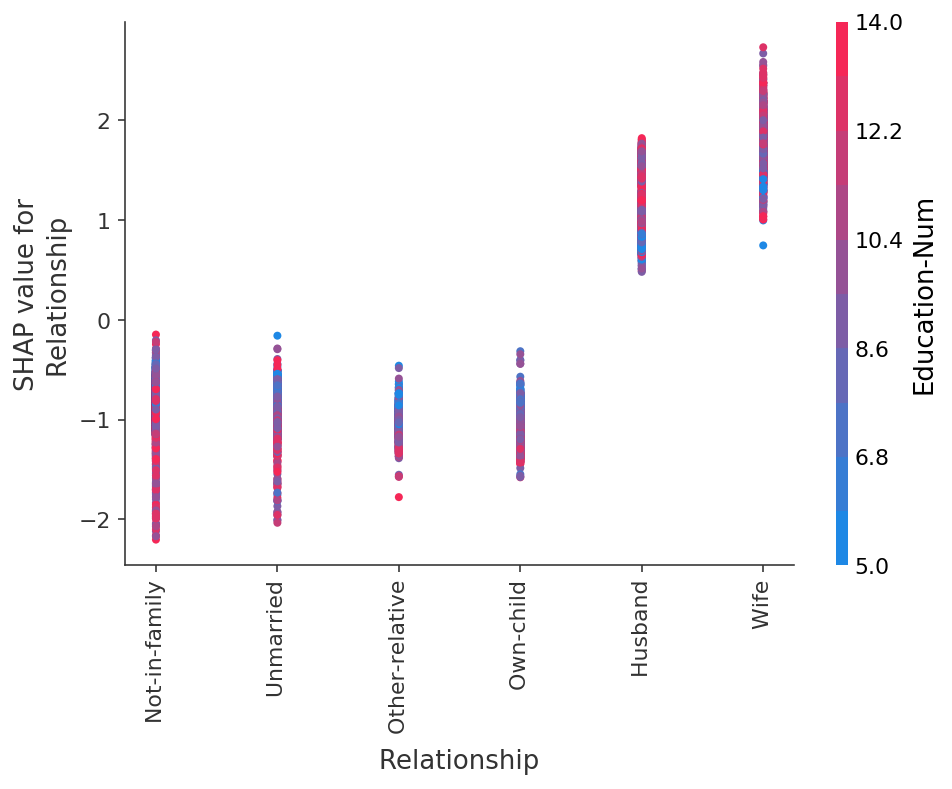

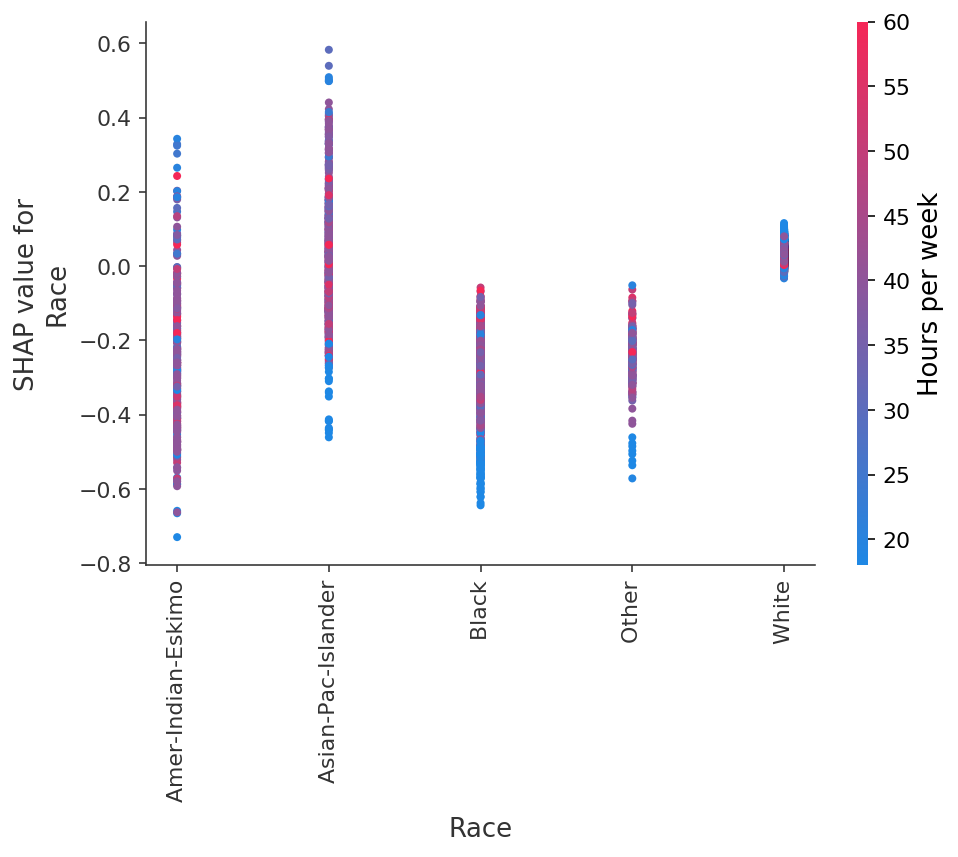

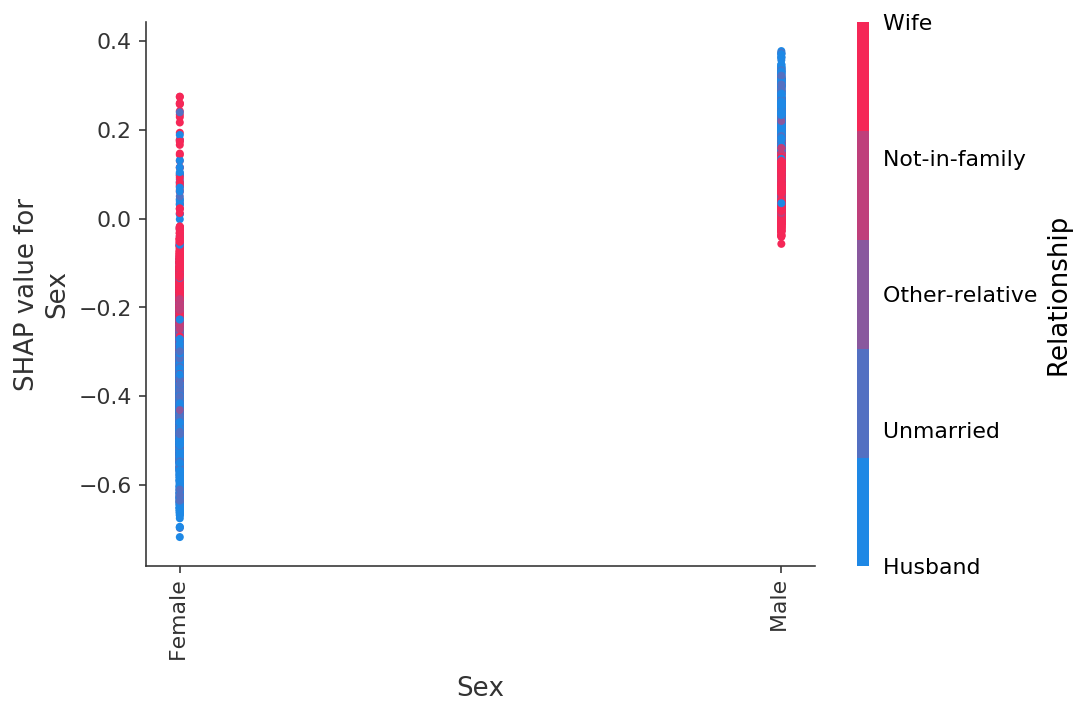

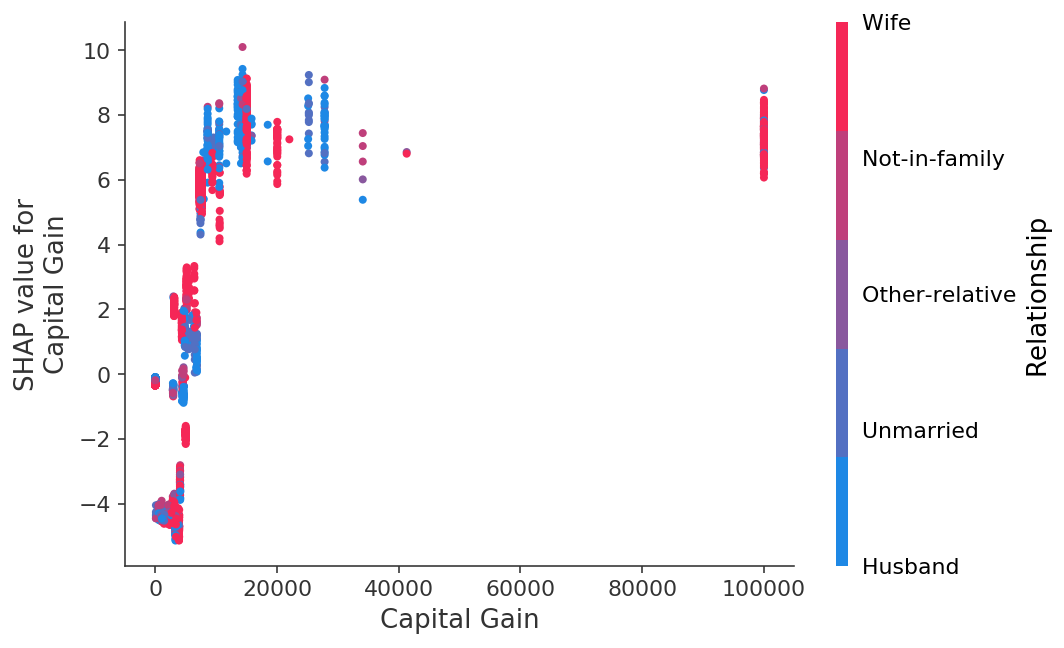

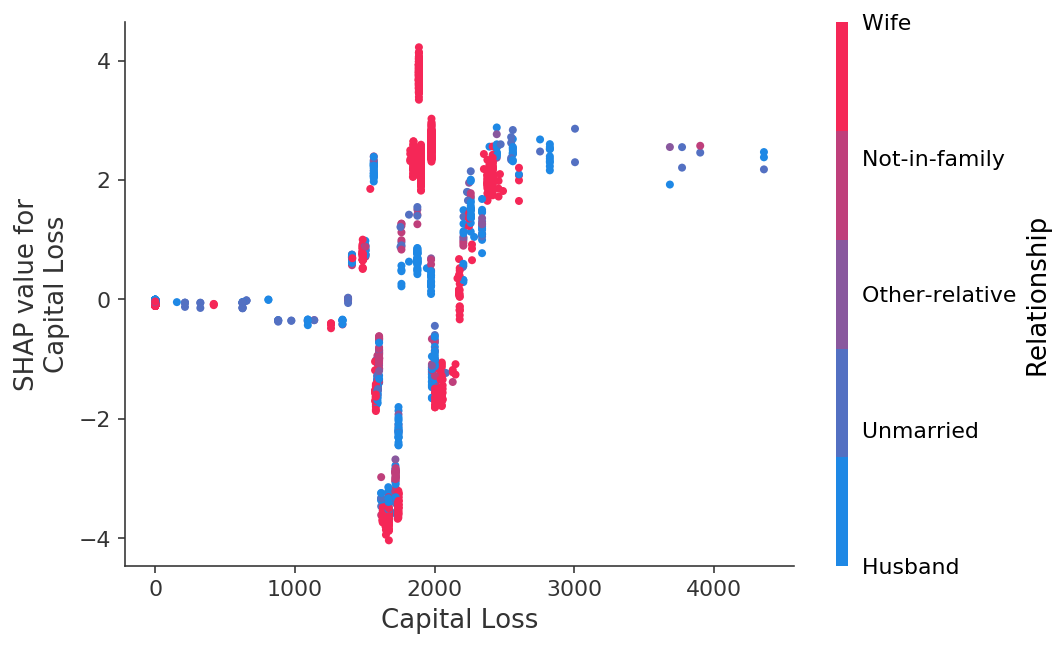

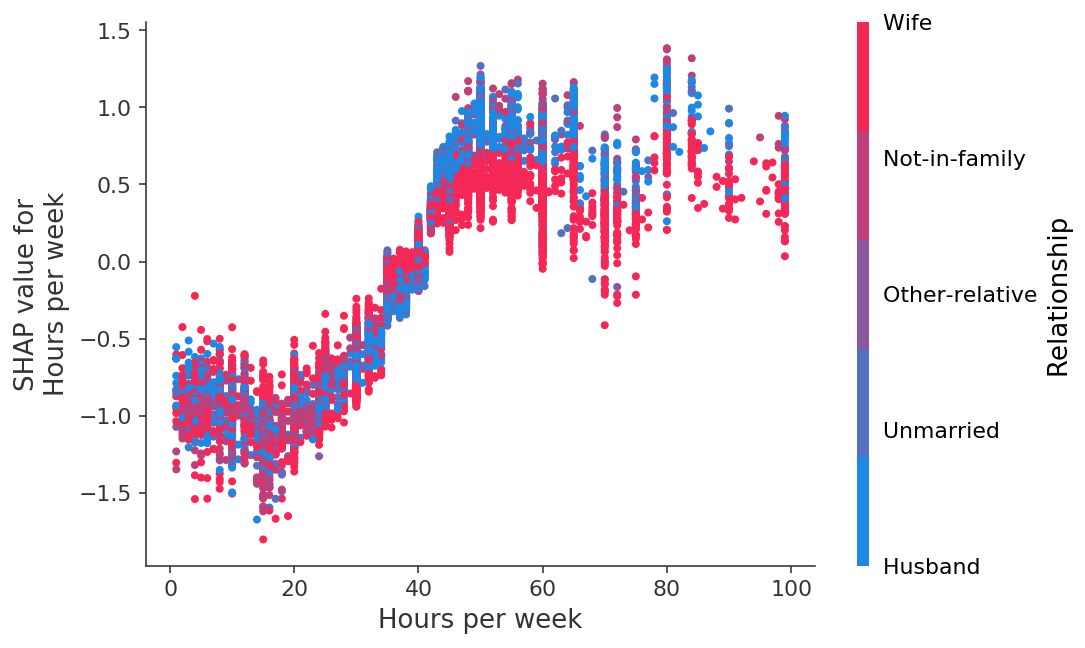

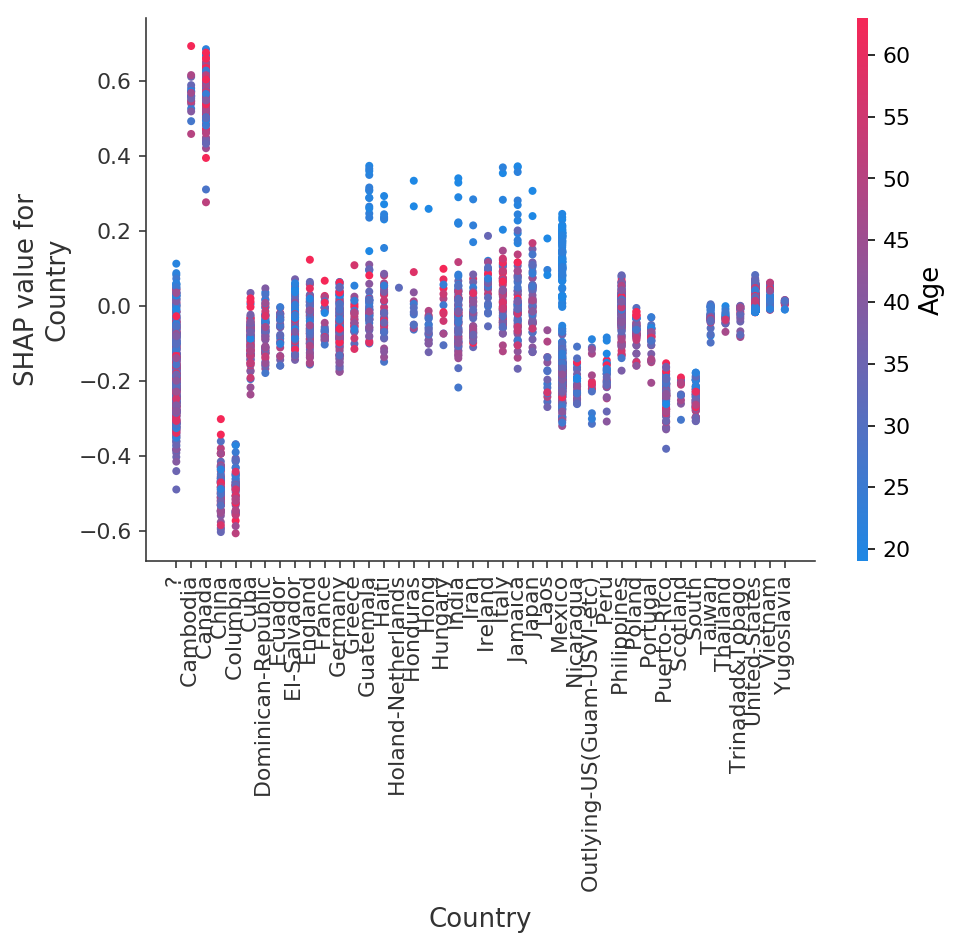

In [8]:
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, X, display_features=X_display)

### Train a model with only two leaves per tree and hence no interaction terms between features

Forcing the model to have no interaction terms means the effect of a feature on the outcome does not depend on the value of any other feature. This is reflected in the SHAP dependence plots below as no vertical spread. A vertical spread reflects that a single value of a feature can have different effects on the model output depending on the context of the other features present for an individual. However, for models without interaction terms, a feature always has the same impact regardless of what other attributes an individual may have.

One the benefits of SHAP dependence plots over traditional partial dependence plots is this ability to distigush between between models with and without interaction terms. In other words, SHAP dependence plots give an idea of the magnitude of the interaction terms through the vertical variance of the scatter plot at a given feature value.

In [9]:
params = {
    "max_bin": 512,
    "learning_rate": 0.1,
    "boosting_type": "gbdt",
    "objective": "binary",
    "metric": "binary_logloss",
    "num_leaves": 2,
    "verbose": -1,
    "min_data": 100,
    "boost_from_average": True
}

model_ind = lgb.train(params, d_train, 20000, valid_sets=[d_test], early_stopping_rounds=50, verbose_eval=1000)

Training until validation scores don't improve for 50 rounds.
[1000]	valid_0's binary_logloss: 0.296136
[2000]	valid_0's binary_logloss: 0.290088
[3000]	valid_0's binary_logloss: 0.28741
[4000]	valid_0's binary_logloss: 0.28534
Early stopping, best iteration is:
[4509]	valid_0's binary_logloss: 0.284541


In [10]:
shap_values_ind = model_ind.predict(X, pred_contrib=True)

Note that the interaction color bars below are meaningless for this model because it has no interactions.

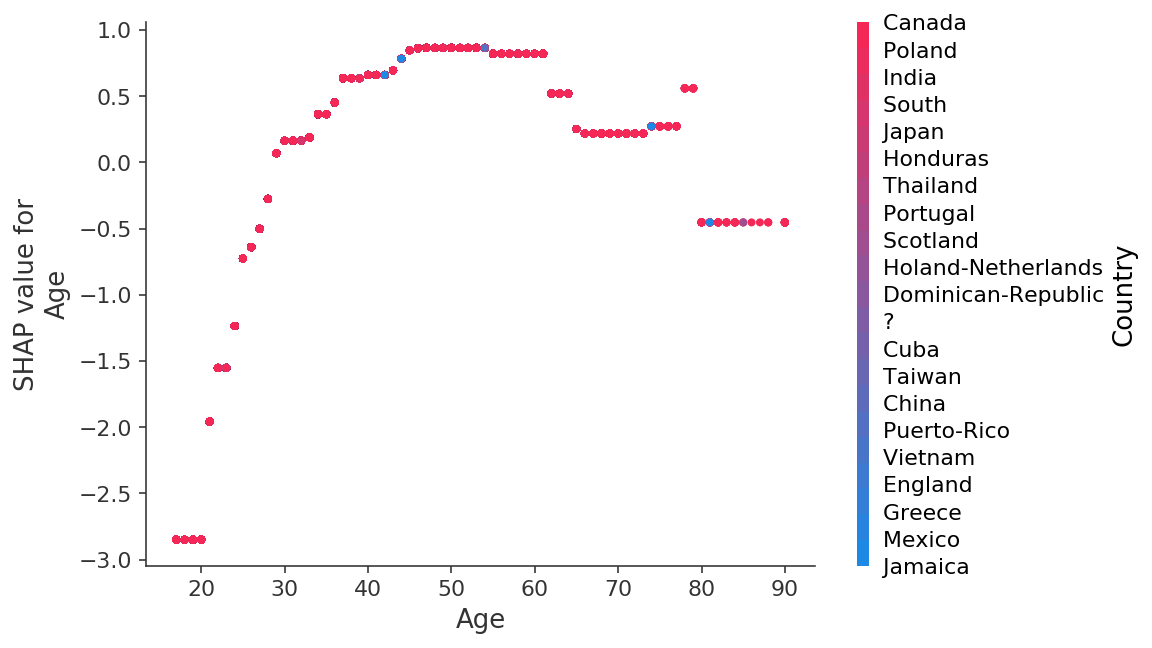

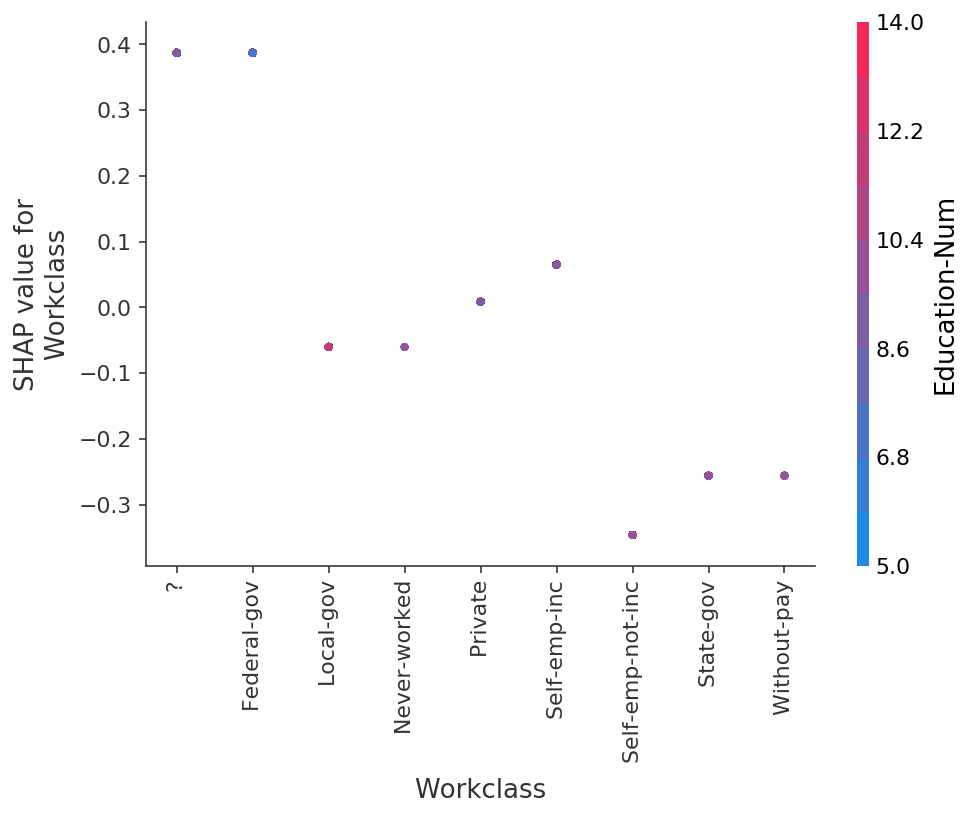

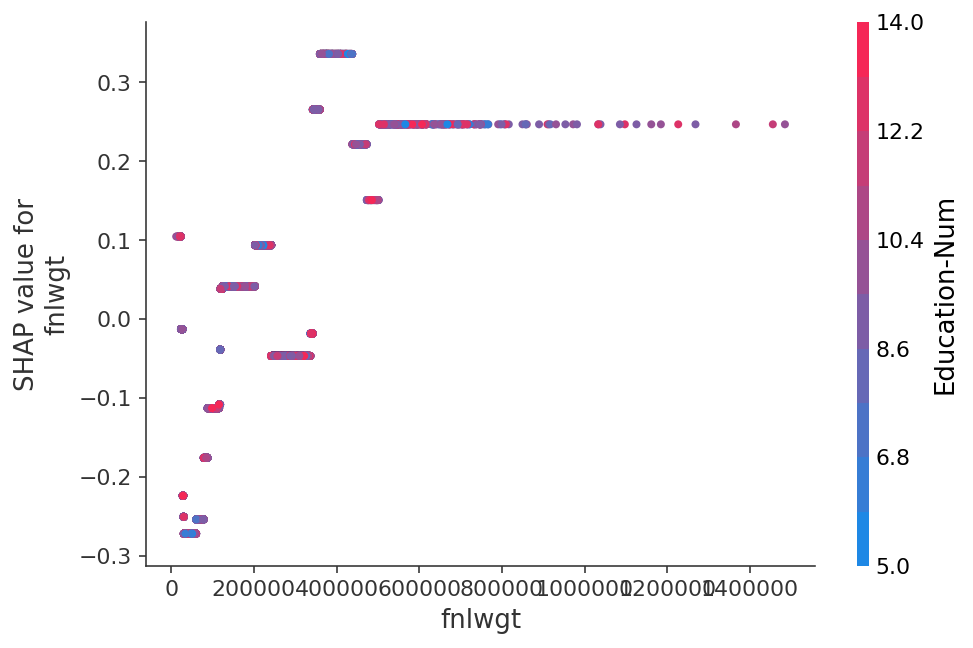

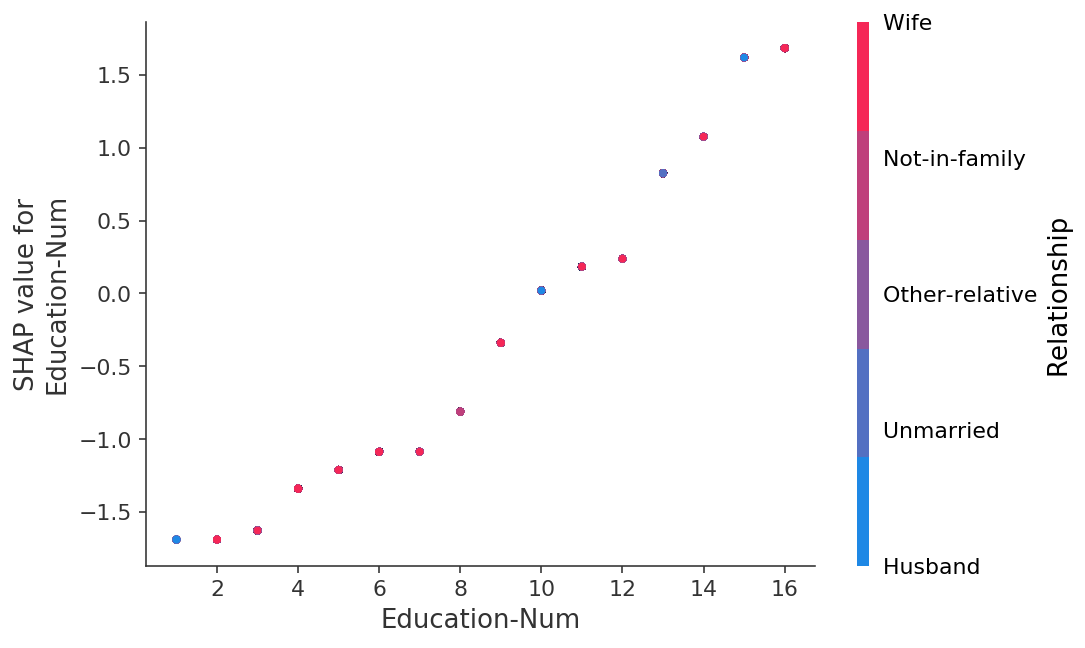

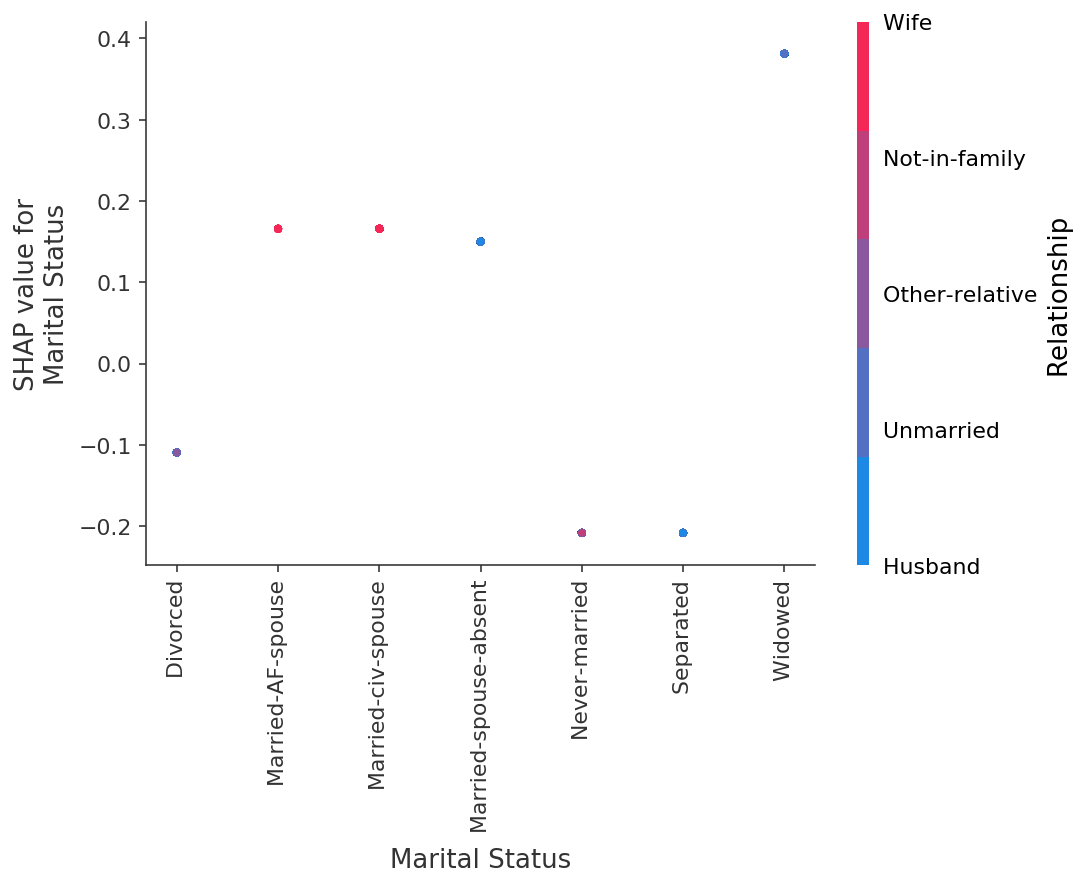

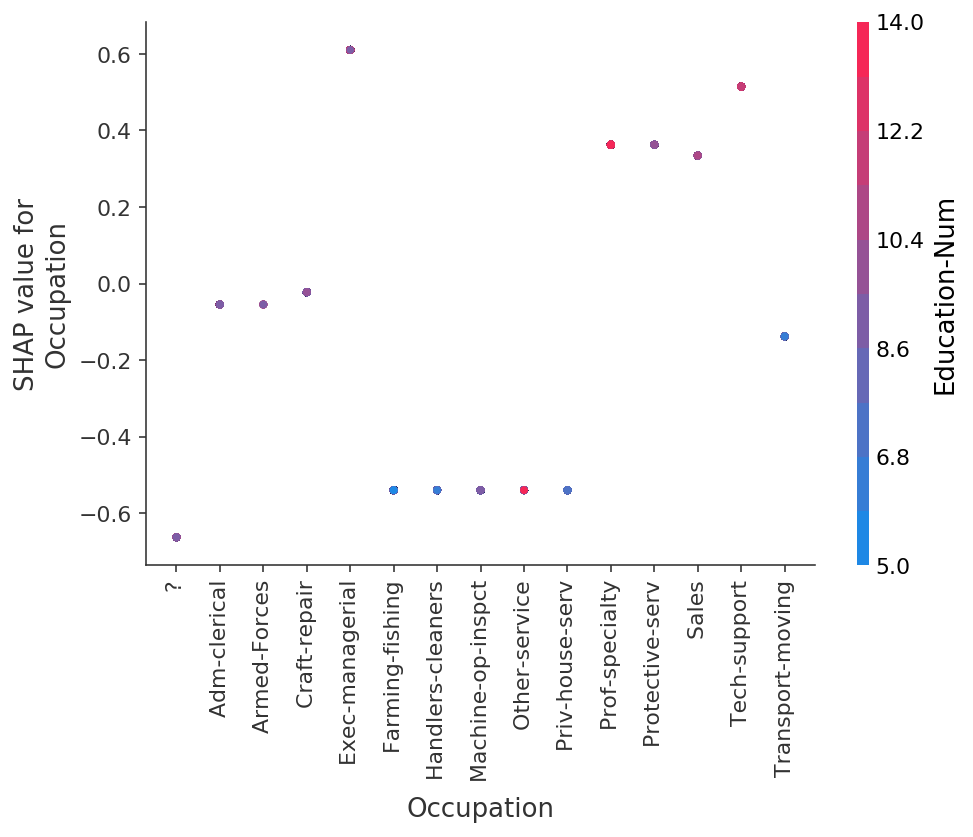

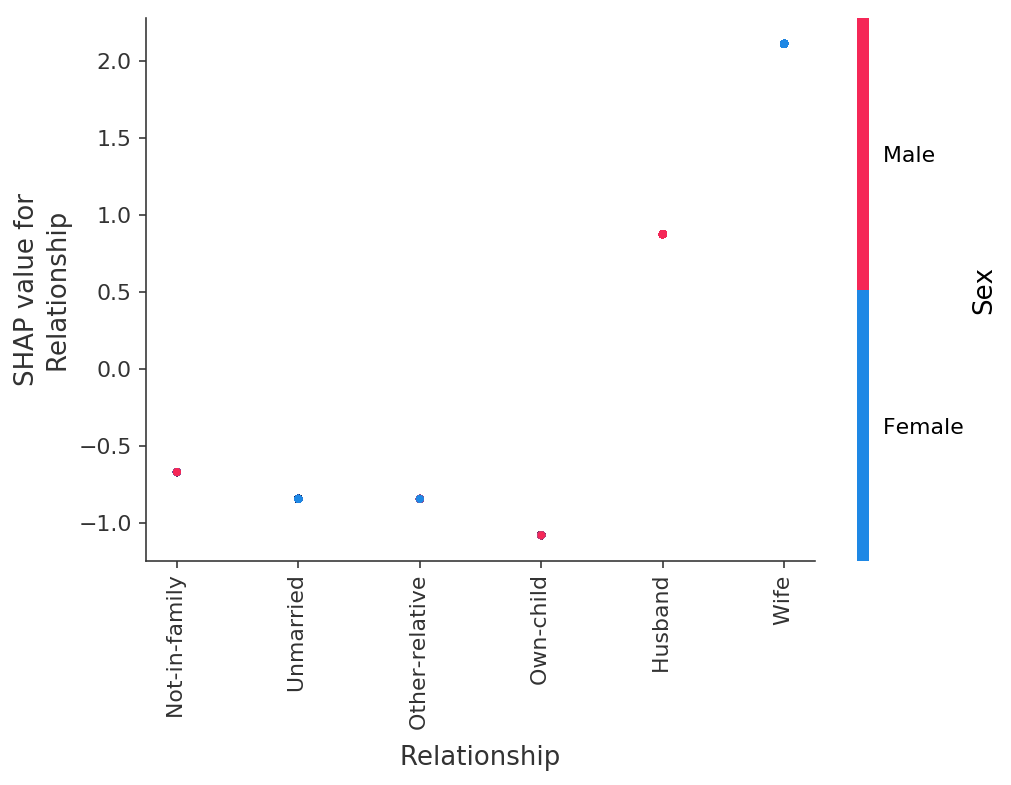

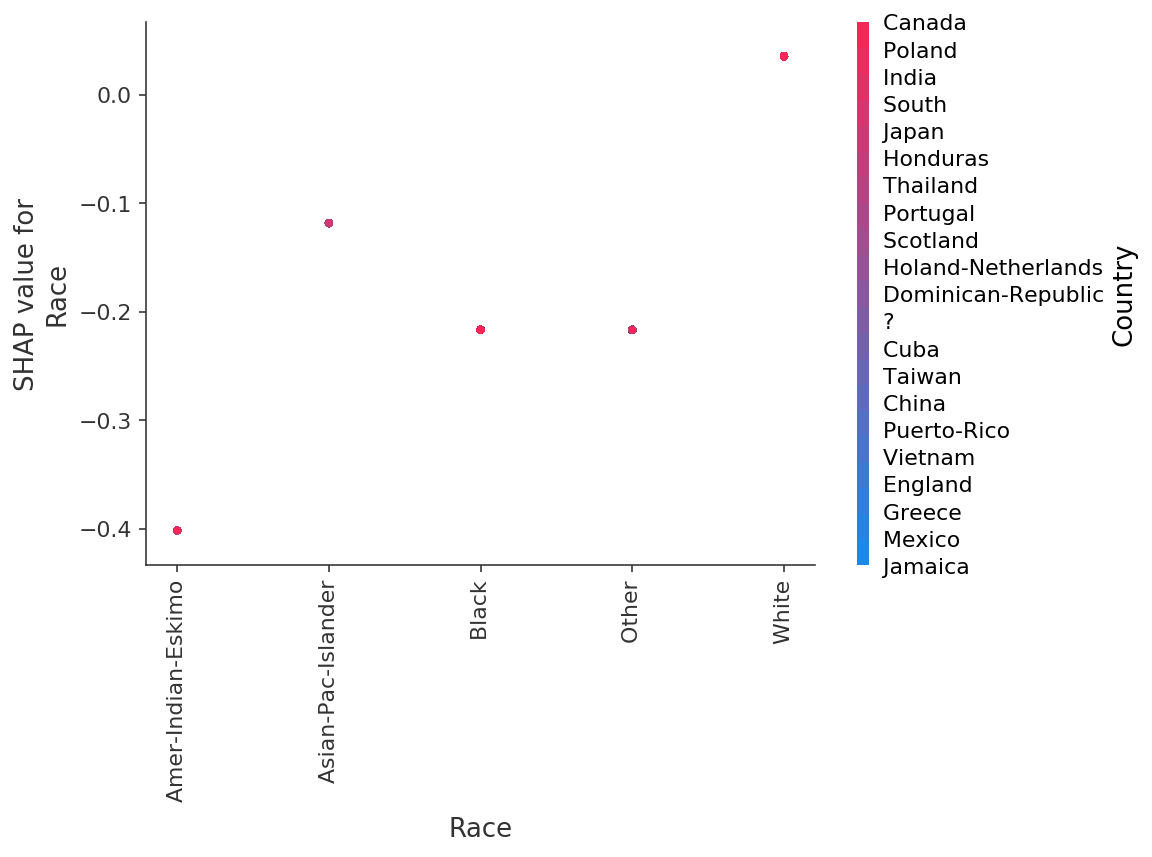

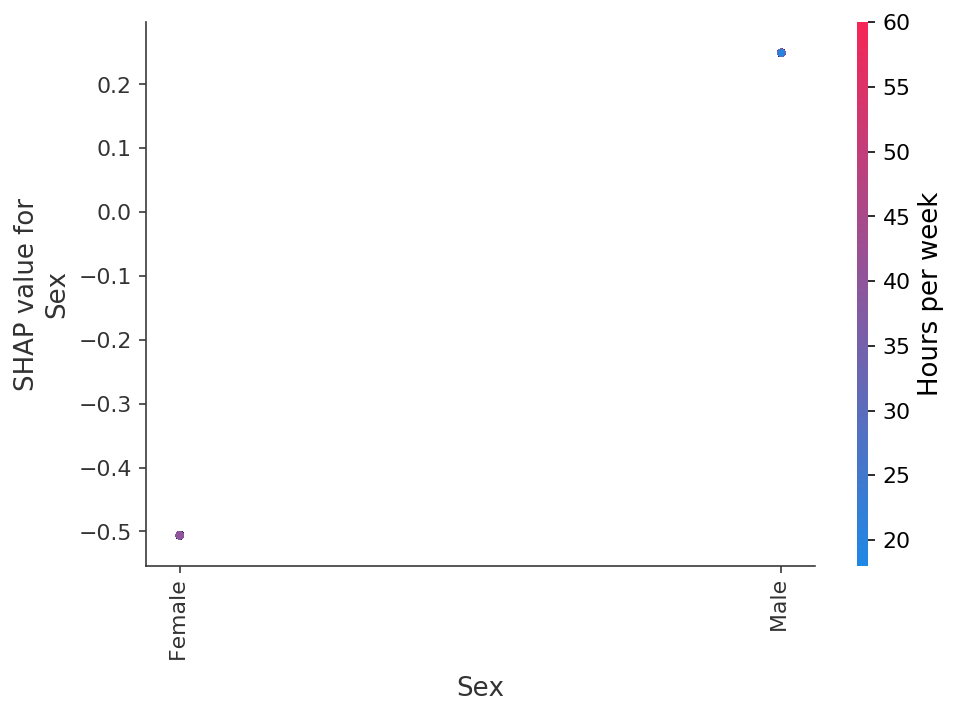

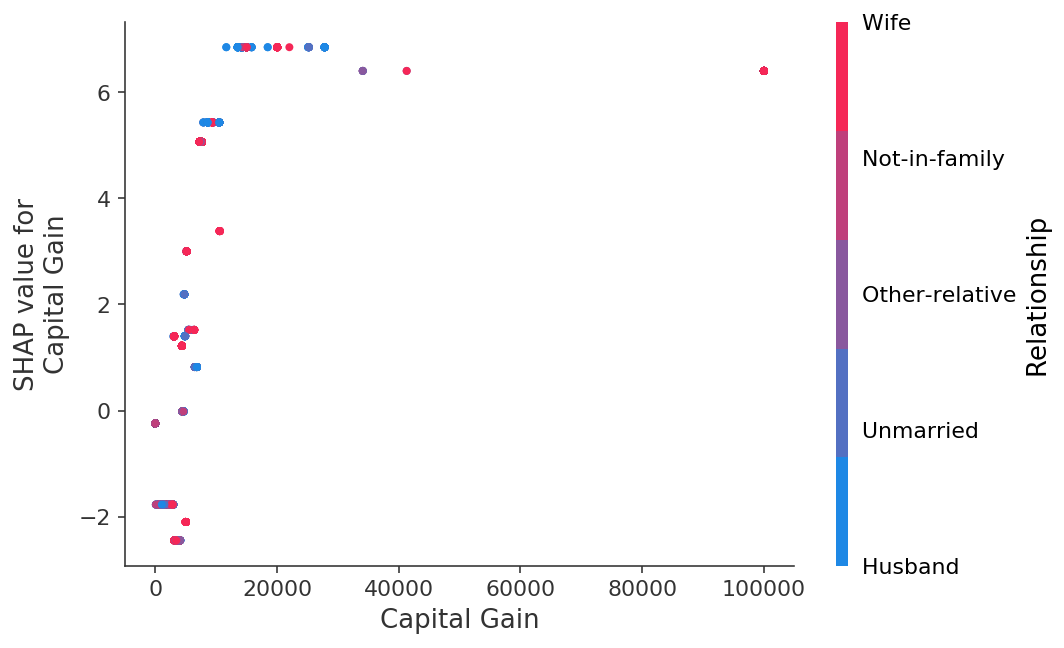

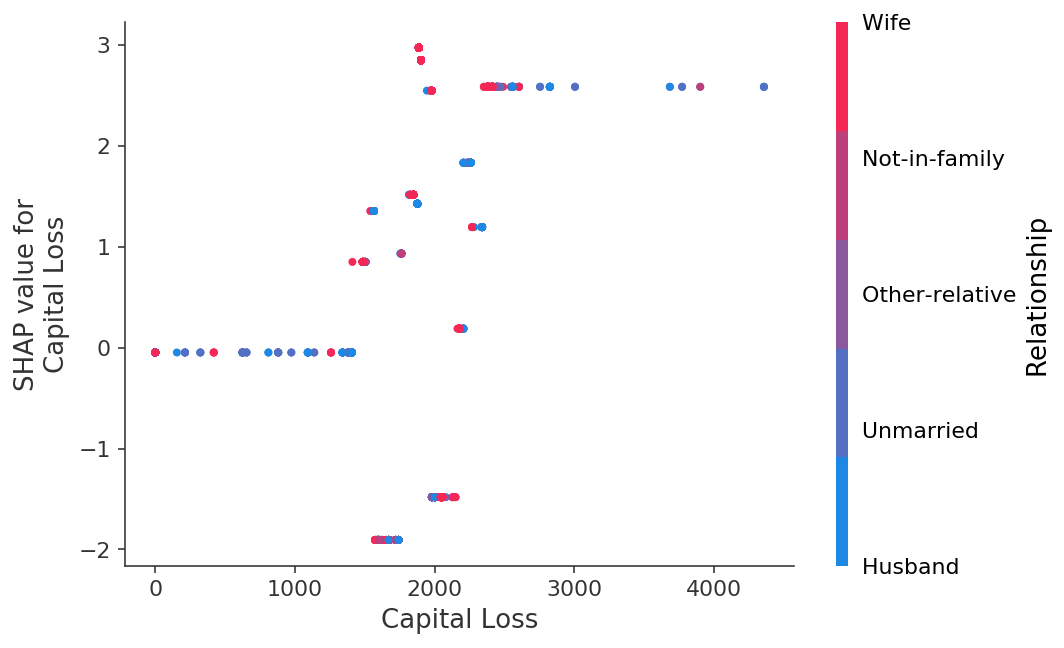

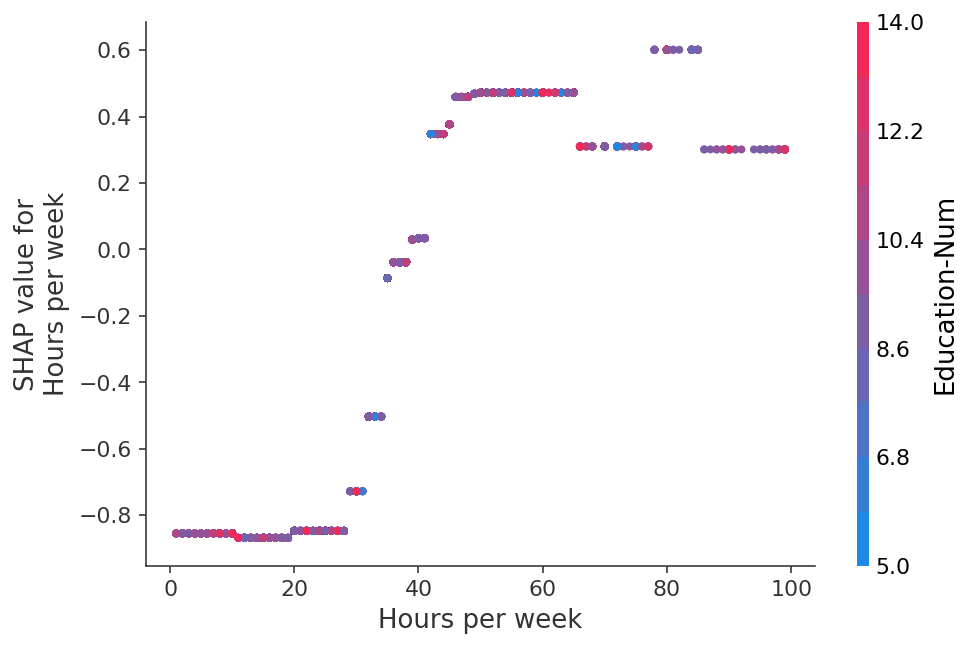

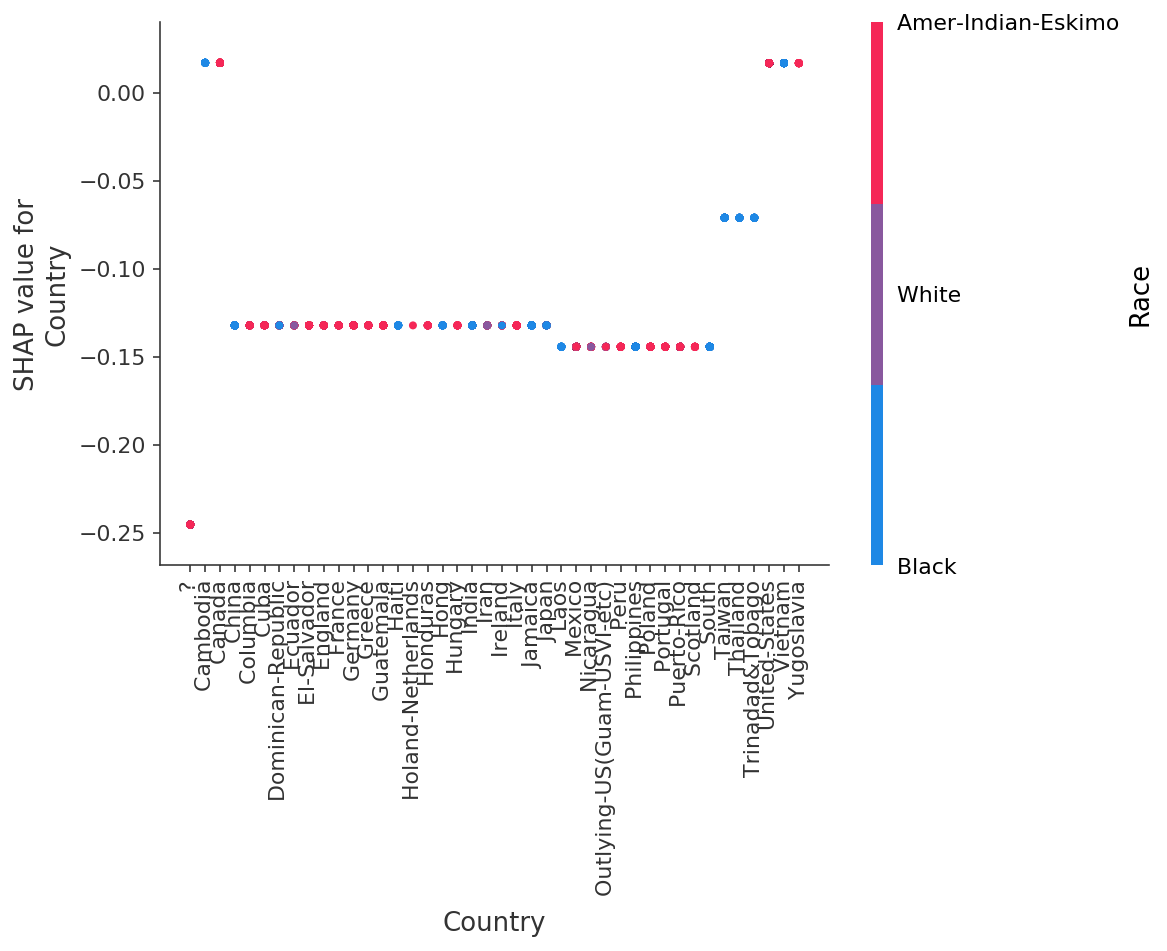

In [11]:
for name in X_train.columns:
    shap.dependence_plot(name, shap_values_ind, X, display_features=X_display)